In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [3]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [5]:
def plot_data(train_data=X_train,
          train_labels=y_train,
          test_data=X_test,
          test_labels=y_test,
          preds=None):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c='b', s = 4, label='Train')
    plt.scatter(test_data, test_labels, c='g', s = 4, label='Test')
    if preds is not None:
        plt.scatter(test_data, preds, c='r', s = 4, label='Predictions')
    plt.legend()

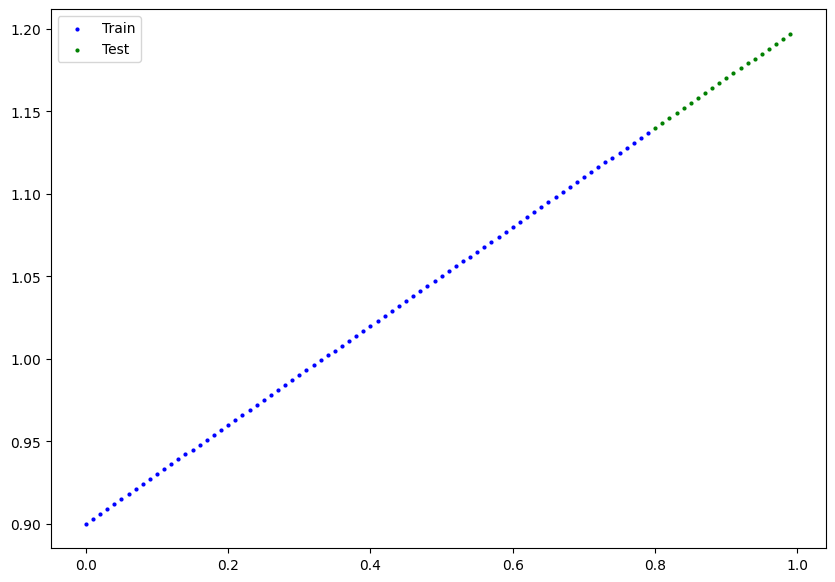

In [6]:
plot_data()

In [7]:
class NewModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(data=torch.randn(1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(data=torch.randn(1, dtype=torch.float32, requires_grad=True))
        # self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        # return self.linear_layer(x)
        return self.weight * x + self.bias

In [8]:
torch.manual_seed(42)
model = NewModel()

from pprint import pprint

pprint(model)
pprint(model.state_dict())

NewModel()
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [9]:
model.to(device)

NewModel()

In [10]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)

In [11]:
train_loss = []
test_loss = []
epoch_count = []

torch.manual_seed(42)

epochs = 300

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    train_output = model(X_train)
    loss = loss_fn(train_output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        model.eval()
        with torch.inference_mode():
            test_output = model(X_test)
            test_loss = loss_fn(test_output, y_test)
            print(f'Epoch {epoch} | Train Loss {loss} | Test Loss {test_loss}')

Epoch 0 | Train Loss 0.7566978931427002 | Test Loss 0.7248174548149109
Epoch 20 | Train Loss 0.5254929065704346 | Test Loss 0.4541124403476715
Epoch 40 | Train Loss 0.2942880392074585 | Test Loss 0.18340764939785004
Epoch 60 | Train Loss 0.07658576965332031 | Test Loss 0.07274086028337479
Epoch 80 | Train Loss 0.05255373939871788 | Test Loss 0.11581540107727051
Epoch 100 | Train Loss 0.04554273188114166 | Test Loss 0.10467890650033951
Epoch 120 | Train Loss 0.038688670843839645 | Test Loss 0.08938358724117279
Epoch 140 | Train Loss 0.03183453530073166 | Test Loss 0.07408786565065384
Epoch 160 | Train Loss 0.024982361122965813 | Test Loss 0.0581042543053627
Epoch 180 | Train Loss 0.018130186945199966 | Test Loss 0.04212063178420067
Epoch 200 | Train Loss 0.011278990656137466 | Test Loss 0.02579306997358799
Epoch 220 | Train Loss 0.004429381340742111 | Test Loss 0.009467745199799538
Epoch 240 | Train Loss 0.00370177929289639 | Test Loss 0.006489444058388472
Epoch 260 | Train Loss 0.00370

In [12]:
model.state_dict()

OrderedDict([('weight', tensor([0.3067], device='mps:0')),
             ('bias', tensor([0.9011], device='mps:0'))])

In [13]:
model.eval()
with torch.inference_mode():
    ypreds = model(X_test)

In [14]:
ypreds = ypreds.cpu()

In [15]:
# X_train = X_train.cpu()
# X_test = X_test.cpu()
# y_train = y_train.cpu()
# y_test = y_test.cpu()

In [16]:
len(X_train), len(y_train)

(80, 80)

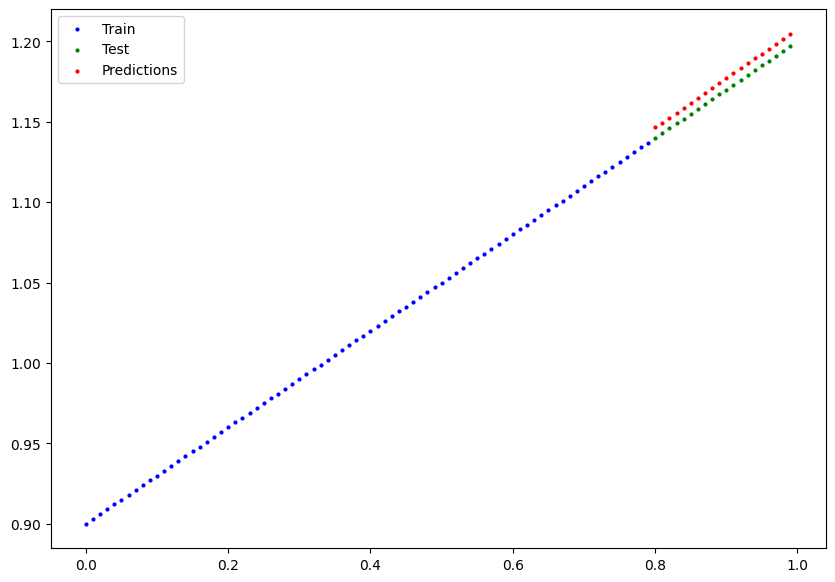

In [18]:
plot_data(preds=ypreds)

In [24]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)

MODEL_NAME = "01_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_model


In [25]:
loaded_model = NewModel()
loaded_model.load_state_dict

In [29]:
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/var/folders/fz/m3b664vj5hq4kdmwr645k9_h0000gn/T/ipykernel_78664/1318612949.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MOD

<All keys matched successfully>

In [30]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.3067])), ('bias', tensor([0.9011]))])

In [32]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [36]:
loaded_model.to(device)

NewModel()

In [37]:
loaded_model.eval()
with torch.inference_mode():
    loaded_ypreds = loaded_model(X_test)

In [40]:
loaded_ypreds.cpu() == ypreds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])